# &#x1F4D1; &nbsp; <span style="color:#338DD4"> Reflections. Machine Learning for Trading. Lessons 1</span>

##  &#x1F4CA; &nbsp; Links

API Reference, pandas: http://pandas.pydata.org/pandas-docs/stable/api.html

PyAlgoTrade documentation: http://gbeced.github.io/pyalgotrade/docs/v0.15/html/index.html

Optimization (scipy.optimize): https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/optimize.html

### 01-01 Reading and plotting stock data

In [3]:
# Quiz: Read CSV
import pandas as pd

def test_run():
    """Function called by Test Run."""
    df = pd.read_csv("data/AAPL.csv")
    # TODO: Print last 5 rows of the data frame
    print (df.tail(5))

# if __name__ == "__main__":
#     test_run()

In [4]:
# Quiz: Compute Mean Volume

"""Compute mean volume"""

import pandas as pd

def get_mean_volume(symbol):
    """Return the mean volume for stock indicated by symbol.
    
    Note: Data for a stock is stored in file: data/<symbol>.csv
    """
    df = pd.read_csv("data/{}.csv".format(symbol))  # read in data
    # TODO: Compute and return the mean volume for this stock
    return df['Volume'].mean()

def test_run():
    """Function called by Test Run."""
    for symbol in ['AAPL', 'IBM']:
        print "Mean Volume"
        print symbol, get_mean_volume(symbol)


# if __name__ == "__main__":
#     test_run()

In [11]:
# Quiz: Plot High Prices For IBM

"""Plot High prices for IBM"""

import pandas as pd
import matplotlib.pyplot as plt

def test_run():
    df = pd.read_csv("data/IBM.csv")
    # TODO: Your code here
    df['High'].plot()
    plt.show()  # must be called to show plots


# if __name__ == "__main__":
#     test_run()


### 01-02 Working with multiple stocks

In [6]:
# Quiz: NYSE Trading Days
252

252

In [7]:
# Quiz: Types Of "Join"
how='inner'

In [8]:
# Quiz: Types Of "Join"
"""Utility functions"""

import os
import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col='Date', parse_dates=True, 
                              usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        
        df = df.join(df_temp, how='inner')
        
    return df


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-01-26')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    print df


# if __name__ == "__main__":
#    test_run()

In [9]:
# Quiz: How To Plot On "Equal Footing"?
# Note: As per pandas syntax, the second option should actually read:
# df = df / df.ix[0]

# Or, to be more explicit:
# df = df / df.ix[0, :]

#### Quiz: Slice And Plot Two Stocks

Instructions:

Implement the function plot_selected() which accepts a dataframe, a list of columns and the starting and ending row indices, and plots the selected data.

Remember to call plt.show() at the end, or better - use the plot_data() function defined earlier.

Use Test Run to execute your code, and try to plot the desired subset of the dataframe.

You do not need to Submit your code - this is an ungraded exercise. Please continue to view the answer when you are satisfied with the results.

In [10]:
"""Slice and plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt


def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    df[columns][start_index: end_index].plot()
    plt.show()


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')


# if __name__ == "__main__":
#     test_run()

### 01-03 The power of NumPy

In [ ]:
# Quiz: Specify The Datatype
# dtype=int

In [ ]:
# Quiz: Locate Maximum Value
# return np.argmax(a)  
# return a.argmax()

In [ ]:
'''
%time: How long does it take to run once
%timeit: Averaged over multiple runs
%prun/%lprun: Per-function/line profiling
'''

### 01-04 Statistical analysis of time series

In [ ]:
rm_SPY = pd.rolling_mean ( df ['SPY'] , window =20)

In [ ]:
rstd_SPY = pd.rolling_std( df ['SPY'] , window =20)

In [ ]:
"""Bollinger Bands."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values, window=window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band, lower_band = rm + 2 * rstd, rm - 2 * rstd
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    test_run()


![](https://plot.ly/pandas/bollinger-bands/)

In [ ]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    new_df = df.copy()
    new_df[1:] = df[1:] / df[:-1].values - 1
    new_df.ix[0,:] = 0
    return new_df

def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()


In [ ]:
# Variant 2

daily_return = prices.pct_change(1) # 1 for ONE DAY lookback
monthly_return = prices.pct_change(21) # 21 for ONE MONTH lookback
annual_return = prices.pct_change(252) # 252 for ONE YEAR lookback

# Variant 3 

new_df = df / df.shift(1)- 1
new_df.ix[0,:] = 0

In [ ]:
# Cumulative return is calculated by finding the gain from the beginning of the range to the current time
# cum_ret[t] = price[t]/price[0] â 1

In [ ]:
df['perc_returns'] = (1 + df['daily_returns']).cumprod() - 1

In [ ]:
df.ix["Cumulative"] = ((df+1).cumprod()-1).iloc[-1]

### 01-05 Incomplete data

In [ ]:
# Quiz: Pandas Fillna()
fillna(method='ffill')

In [2]:
# Quiz:
"""Fill missing values"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    ##########################################################
    # TODO: Your code here (DO NOT modify anything else)
    ##########################################################
    df_data.fillna(method='ffill', inplace=True)
    df_data.fillna(method='bfill', inplace=True)
    return df_data

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_final = pd.DataFrame(index=dates)
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(file_path, parse_dates=True, index_col="Date",
            usecols=["Date", "Adj Close"], na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade
            df_final = df_final.dropna(subset=["SPY"])

    return df_final


def plot_data(df_data):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title="Stock Data", fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    """Function called by Test Run."""
    # Read data
    symbol_list = ["JAVA", "FAKE1", "FAKE2"]  # list of symbols
    start_date = "2005-12-31"
    end_date = "2014-12-07"
    dates = pd.date_range(start_date, end_date)  # date range as index
    df_data = get_data(symbol_list, dates)  # get data for each symbol

    # Fill missing values
    fill_missing_values(df_data)

    # Plot
    plot_data(df_data)


# if __name__ == "__main__":
#     test_run()


In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected( df , columns , start_ind , end_ind ):
    print df.ix [ start_ind : end_ind , columns ]
    plot_data ( df.ix [ start_ind : end_ind , columns ])

def symbol_to_path( symbol , base_dir =" data "):
    return os.path.join ( base_dir ,"{}.csv ".format ( str( symbol ) ) )

def get_data( symbols , dates ):
    df = pd.DataFrame ( index = dates )
    print df

    if 'SPY' not in symbols:
        symbols.insert (0 , 'SPY')

    for symbol in symbols:
        tmp = pd.read_csv ( symbol_to_path ( symbol ) , index_col =" Date ",
        parse_dates =True , usecols =[ 'Date','Close'] , na_values =['nan'])
        tmp = tmp.rename ( columns ={ 'Close': symbol })
        df = df.join ( tmp )
        
        if symbol == 'SPY':
            df = df.dropna ( subset =['SPY'])
    return df

def plot_data( df , title =" Stock prices "):
    ax = df.plot ( title = title , fontsize=12)
    ax.set_xlabel (" Date ")
    ax.set_ylabel (" Closing price ")

    plt.show()

def test_run():
    dates = pd.date_range ('2010-01-01', '2010-12-31')

    symbols = ['IBM', 'GLD']

    df = get_data( symbols , dates )
 
    print df
    plot_selected( df ,['SPY', 'IBM'] , '2010-03-01', '2010-04-01')

# if __name__ == " __main__ ":
# test_run ()

In [ ]:
# Example of fill missing values
def preprocess_features(X):
    ''' Preprocesses the data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # Replace 'nan' in 'Embarked'
        most_common = pd.get_dummies(X['Embarked']).sum().sort_values(ascending=False).index[0]
        if col == 'Embarked':
            col_data = col_data.replace('nan', most_common)
        
        # Replace 'Nan' in 'Age'
        mean1 = X['Age'].mean()
        if col == 'Age':
            col_data = col_data.replace('NaN', mean1)
            
        # Replace 'Nan' in 'Fare'
        mean2 = X['Fare'].mean()
        if col == 'Fare':
            col_data = col_data.replace('NaN', mean2)
        
        # If data type is non-numeric, replace all male/female, yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['male', 'female'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

### 01-06 Histograms and scatter plots

In [ ]:
# Quiz: What Would It Look Like?
# Normal Distribution   

In [ ]:
mean = daily_returns['SPY'].mean()
print " mean =", mean

std = daily_returns['SPY'].std()
print "std deviation =", std

In [ ]:
daily_returns.hist( bins =20)
plt.axvline( mean , color ='w', linestyle = 'dashed', linewidth =2)
plt.axvline( mean + std , color ='r', linestyle = 'dashed', linewidth =2)
plt.axvline( mean - std , color ='r', linestyle = 'dashed', linewidth =2)

In [ ]:
# Hist combining tips

In [ ]:
#Two hists in one
import requests
url=""
url_file=requests.get(url).content
train_data = pd.read_csv(url_file)


# Data for male passengers
male = train_data[train_data.Sex=='male']
male.Age.hist(alpha=0.7)
male[male.Survived==1].Age.hist(alpha=0.7)

# Labels, title, legend
plt.xlabel("Age")
plt.ylabel("Number by age")
plt.title("Male Passengers, Statistics by Age", fontsize=20)
plt.legend(["Number of Male Passengers", 
           "Male Survived Passengers by Age"])

# Data for male and young passengers
young_male = male[male.Age < 15]
survived_young_male = young_male[young_male.Survived==1]

# Create histogram
plt.hist((young_male.Pclass, survived_young_male.Pclass), 
          bins=range(1,5), rwidth=0.7, alpha=0.7, align='left')

# Ticks, labels, title, legend
plt.xticks([1,2,3])
plt.xlabel("Plass")
plt.ylabel("Number by Pclass")
plt.title("Male Young Passengers, Statistics by Pclass", fontsize=20)
plt.legend(["Male Young Passengers", "Survived Male Young Passengers"])

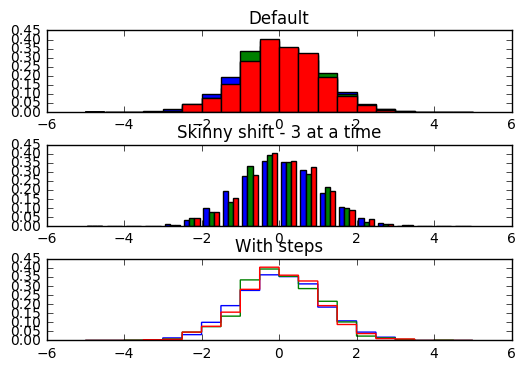

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(101)
a = np.random.normal(size=1000)
b = np.random.normal(size=1000)
c = np.random.normal(size=1000)

common_params = dict(bins=20, 
                     range=(-5, 5), 
                     normed=True)

plt.subplots_adjust(hspace=.4)
plt.subplot(311)
plt.title('Default')
plt.hist(a, **common_params)
plt.hist(b, **common_params)
plt.hist(c, **common_params)
plt.subplot(312)
plt.title('Skinny shift - 3 at a time')
plt.hist((a, b, c), **common_params)
plt.subplot(313)
common_params['histtype'] = 'step'
plt.title('With steps')
plt.hist(a, **common_params)
plt.hist(b, **common_params)
plt.hist(c, **common_params)

plt.savefig('3hist.png')
plt.show()

In [ ]:
# scatter plot for XOM vs SPY
daily_ret.plot( kind = 'scatter', x = 'SPY', y ='XOM', title = " Scatter plot ")

beta_XOM , alpha_XOM = np.polyfit( daily_ret ['SPY'] , daily_ret ['XOM'] ,1)

plt.plot( daily_ret['SPY'] , beta_XOM * daily_ret ['SPY']+ alpha_XOM , '-', color = 'r')
plt.show()

# scatter plot for GLD vs SPY
daily_ret.plot( kind =âscatter â,x = 'SPY',y = 'GLD', title =" Scatter plot ")

beta_GLD , alpha_GLD = np.polyfit( daily_ret['SPY'] , daily_ret ['GLD'] ,1)

plt.plot( daily_ret['SPY'] , beta_GLD * daily_ret['SPY']+ alpha_GLD , '-', color = 'r')
plt.show()

print " Beta XOM: ", beta_XOM
print " Alpha XOM: ", alpha_XOM
print " Beta GLD: ", beta_GLD
print " Alpha GLD: ", alpha_GLD

# calculate correlation using pearson method
print " Correlation matrix : \n", daily_ret.corr( method = 'pearson' )


### 01-07 Sharpe ratio and other portfolio statistics

In [ ]:
start_val = 1000000
start_date = '2009-01-01'
end_date = '2011-12-31'
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
allocs = [0.4 , 0.4 , 0.1 , 0.1]

In [ ]:
# get cumulative returns
df = get_data( symbols , pd.date_range( start_date , end_date ) )

def normalize_data( df ):
    df = df / df.ix [0, :]
    return df

df = normalize( df )

# get changes for each stock by their percentages of the starting value
alloced = df * allocs

# get dollar value of changes
vals = alloced * start_val

# sum to get total value
portfolio_value = vals.sum( axis = 1)

In [ ]:
daily_rets = daily_rets[1:]
cum_ret = ( portfolio_value[ -1]/ portfolio_value.ix[0 ,:]) - 1
avg_daily_ret = daily_rets.mean ()
std_daily_ret = daily_rest.std ()

In [ ]:
def calcStats(na_normalized_price, lf_allocations):
    #Calculate cumulative daily portfolio value
    #row-wise multiplication by weights
    na_weighted_price = na_normalized_price * lf_allocations;
    #row-wise sum
    na_portf_value = na_weighted_price.copy().sum(axis=1);

    #Calculate daily returns on portfolio
    na_portf_rets = na_portf_value.copy()
    tsu.returnize0(na_portf_rets);

    #Calculate volatility (stdev) of daily returns of portfolio
    f_portf_volatility = np.std(na_portf_rets); 

    #Calculate average daily returns of portfolio
    f_portf_avgret = np.mean(na_portf_rets);

    #Calculate portfolio sharpe ratio (avg portfolio return / portfolio stdev) * sqrt(252)
    f_portf_sharpe = (f_portf_avgret / f_portf_volatility) * np.sqrt(250);

    #Calculate cumulative daily return
    #...using recursive function
    def cumret(t, lf_returns):
        #base-case
        if t==0:
            return (1 + lf_returns[0]);
        #continuation
        return (cumret(t-1, lf_returns) * (1 + lf_returns[t]));
    f_portf_cumrets = cumret(na_portf_rets.size - 1, na_portf_rets);

    return [f_portf_volatility, f_portf_avgret, f_portf_sharpe, f_portf_cumrets, na_portf_value];

In [ ]:
# Quiz: What Is The Sharpe Ratio?
# Recall the formula for computing Sharpe ratio:

k * mean(_daily_rets_ - _daily_rf_) / std(_daily_rets_)
# where k = sqrt(252) for daily sampling.

In [11]:
# daily sampling !!! (not important how many days)
import math
math.sqrt(252)*(0.001-0.0002)/0.001

12.699606293110037

### 01-08 Optimizers: Building a parameterized model

In [27]:
import scipy.optimize as spo

def f( x ):
    y = (x-1.5)**2 + .5
    print "x = {} , y = {}". format(x , y )
    return y

def test_run():
    guess = 2.0
    min_result = spo.minimize (f, guess, method = 'SLSQP', options = {'disp': True })
    print " minima found at:"
    print "x = {} , y = {}".format( min_result.x , min_result.fun )

In [30]:
test_run()

x = [ 2.] , y = [ 0.75]
x = [ 2.] , y = [ 0.75]
x = [ 2.00000001] , y = [ 0.75000001]
x = [ 0.99999999] , y = [ 0.75000001]
x = [ 1.5] , y = [ 0.5]
x = [ 1.5] , y = [ 0.5]
x = [ 1.50000001] , y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
 minima found at:
x = [ 1.5] , y = [ 0.5]


In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [3]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [4]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [12]:
def rosen_hess_p(x, p):
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp

In [13]:
x0 = np.array([1.8, 0.5, 0.8, 1.6, 1.1])

In [14]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 47
         Hessian evaluations: 21


In [15]:
res.x

array([ 1.,  1.,  1.,  1.,  1.])

In [16]:
res2 = minimize(rosen, x0, method='BFGS', jac=rosen_der,
                options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29


In [17]:
res2.x

array([ 1.        ,  1.        ,  1.        ,  1.00000001,  1.00000001])

In [18]:
res3 = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 47
         Hessian evaluations: 21


In [19]:
res3.x

array([ 1.,  1.,  1.,  1.,  1.])

In [20]:
res4 = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 47
         Hessian evaluations: 60


In [21]:
res4.x

array([ 1.,  1.,  1.,  1.,  1.])

 original line : C0 = 4.0 , C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 667.521794204
            Iterations: 3
            Function evaluations: 18
            Gradient evaluations: 3
Fitted line : C0 = 3.81132171957 , C1 = 3.8349482745


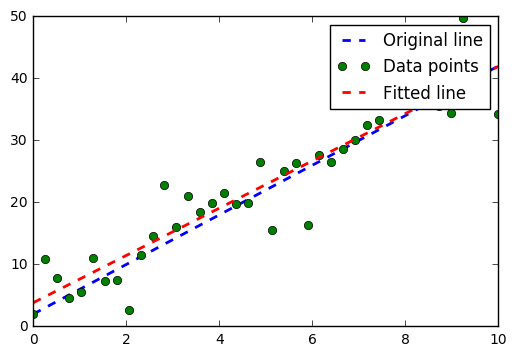

In [32]:
# line is a tuple (C0 , C1)
def error( line , data ):
    return np .sum(( data[: ,1] - ( line[0]* data[: ,0] + line[1]) ) ** 2)

def fit_line ( data , error_func ) :
    # initial guess for parameters
    l = np.float32([0 , np.mean( data [: ,1]) ])
    return spo.minimize ( error_func, l , args =( data,), method = 'SLSQP', options ={'disp': True }).x

def test_run():
    original = np.float32([4 ,2])
    print " original line : C0 = {} , C1 = {}".format( original [0], original [1])
    Xoriginal = np.linspace (0,10,40)
    Yoriginal = original [0]* Xoriginal + original [1]

    plt.plot ( Xoriginal, Yoriginal, 'b--', linewidth =2.0 , label ="Original line")

    # add some random noise to the data
    noise_sigma = 4.0
    noise = np.random.normal (0 , noise_sigma , Yoriginal.shape )
    data = np.asarray ([ Xoriginal , Yoriginal + noise ]).T

    plt.plot ( data[: ,0] , data[: ,1] , 'go', label = "Data points")

    l_fit = fit_line( data , error )
    print "Fitted line : C0 = {} , C1 = {}".format( l_fit[0] , l_fit[1])
    plt.plot( data[: ,0] , l_fit[0]* data[: ,0] + l_fit[1] , 'r--', linewidth = 2.0, label = "Fitted line")

    plt.legend ( loc = 'upper right')
    plt.show()

test_run()


### 01-09 Optimizers: How to optimize a portfolio

1. a function, f(x), to minimize
2. an initial guess for x
3. the optimizer